# Exercise - Domain wall pair conversion

We want to simulate a domain wall conversion in a two-dimensional thin film sample with:

- exchange energy constant $A = 15 \,\text{pJ}\,\text{m}^{-1}$,
- Dzyaloshinskii-Moriya energy constant $D = 3 \,\text{mJ}\,\text{m}^{-2}$,
- uniaxial anisotropy constant $K = 0.5 \,\text{MJ}\,\text{m}^{-3}$ with $\hat{\mathbf{u}} = (0, 0, 1)$ in the out of plane direction,
- gyrotropic ratio $\gamma = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$, and
- Gilbert damping $\alpha=0.3$.

Please carry out the following steps:

1. Create the following geometry with discretisation cell size $(2 \,\text{nm}, 2 \,\text{nm}, 2 \,\text{nm})$.

    <img src="dw_pair_conversion_geometry.png",width=500>

2. Initialise the magnetisation so that when relaxes, a domain pair is present in the narrower part of the geometry.

3. Relax the system. Is a domain wall pair contained in the constrained part?

4. Apply the spin polarised current in the positive $x$ direction with velocity $\mathbf{u} = (400, 0, 0) \,\text{m}\,\text{s}^{-1}$, with $\beta=0.5$.

5. Evolve the system over $0.2 \,\text{ns}$. What did you get? [1]

#### References

[1] Zhou, Y., & Ezawa, M. (2014). A reversible conversion between a skyrmion and a domain-wall pair in a junction geometry. *Nature Communications* **5**, 8. https://doi.org/10.1038/ncomms5652


## Solution

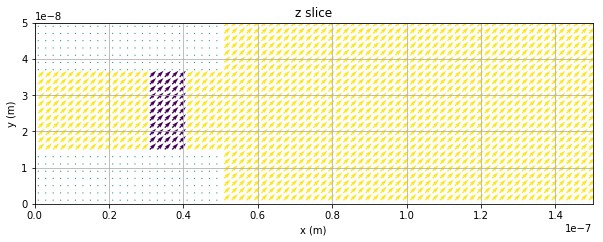

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

Ms = 5.8e5  # saturation magnetisation (A/m)
A = 15e-12  # exchange energy constant (J/)
D = 3e-3  # Dzyaloshinkii-Moriya energy constant (J/m**2)
K = 0.5e6  # uniaxial anisotropy constant (J/m**3)
u = (0, 0, 1)  # easy axis
gamma = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.3  # Gilbert damping

system = oc.System(name="dw_pair_conversion")
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, kind="interfacial") + oc.UniaxialAnisotropy(K=K, u=u)
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=alpha)

p1 = (0, 0, 0)
p2 = (150e-9, 50e-9, 2e-9)
cell = (2e-9, 2e-9, 2e-9)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

def Ms_fun(pos):
    x, y, z = pos
    if x < 50e-9 and (y < 15e-9 or y > 35e-9):
        return 0
    else:
        return Ms
    
def m_init(pos):
    x, y, z = pos
    if 30e-9 < x < 40e-9:
        return (0.1, 0.1, -1)
    else:
        return (0.1, 0.1, 1)

system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

system.m.plot_slice("z", 0);

2017/4/24 9:37: Calling OOMMF (dw_pair_conversion/dw_pair_conversion.mif) ... [1.2s]


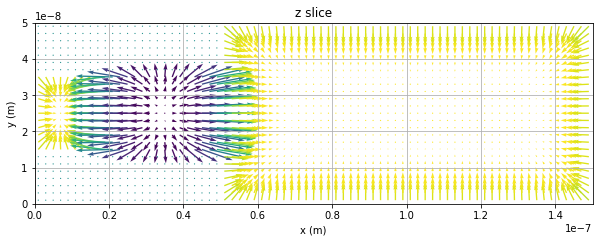

In [2]:
md = oc.MinDriver()
md.drive(system)

system.m.plot_slice("z", 0);

In [3]:
ux = 400  # velocity in x direction (m/s)
beta = 0.5  # non-adiabatic STT parameter

system.dynamics += oc.STT(u=(ux, 0, 0), beta=beta)

2017/4/24 9:37: Calling OOMMF (dw_pair_conversion/dw_pair_conversion.mif) ... [4.6s]


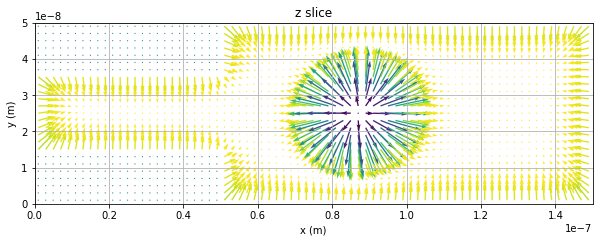

In [4]:
td = oc.TimeDriver()
td.drive(system, t=0.2e-9, n=200)

system.m.plot_slice("z", 0);